Training and evaluating dataset1...
Epoch 1/500
12/12 [==============================] - 0s 906us/step - loss: 0.2371
Epoch 2/500
12/12 [==============================] - 0s 674us/step - loss: 0.1996
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1646
Epoch 4/500
12/12 [==============================] - 0s 753us/step - loss: 0.1338
Epoch 5/500
12/12 [==============================] - 0s 669us/step - loss: 0.1088
Epoch 6/500
12/12 [==============================] - 0s 681us/step - loss: 0.0951
Epoch 7/500
12/12 [==============================] - 0s 607us/step - loss: 0.0922
Epoch 8/500
12/12 [==============================] - 0s 504us/step - loss: 0.0903
Epoch 9/500
12/12 [==============================] - 0s 437us/step - loss: 0.0891
Epoch 10/500
12/12 [==============================] - 0s 407us/step - loss: 0.0886
Epoch 11/500
12/12 [==============================] - 0s 472us/step - loss: 0.0876
Epoch 12/500
12/12 [==============================] - 0s 493us

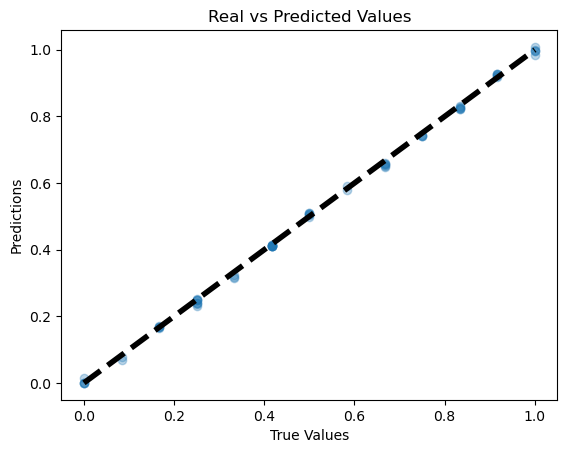

dataset1 - MAE: 0.0069, MAPE: 1.81%

Training and evaluating dataset2...


Epoch 1/500
25/25 [==============================] - 0s 677us/step - loss: 0.4197
Epoch 2/500
25/25 [==============================] - 0s 603us/step - loss: 0.2093
Epoch 3/500
25/25 [==============================] - 0s 585us/step - loss: 0.1583
Epoch 4/500
25/25 [==============================] - 0s 506us/step - loss: 0.1324
Epoch 5/500
25/25 [==============================] - 0s 435us/step - loss: 0.1128
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0975
Epoch 7/500
25/25 [==============================] - 0s 418us/step - loss: 0.0855
Epoch 8/500
25/25 [==============================] - 0s 440us/step - loss: 0.0760
Epoch 9/500
25/25 [==============================] - 0s 425us/step - loss: 0.0686
Epoch 10/500
25/25 [==============================] - 0s 420us/step - loss: 0.0630
Epoch 11/500
25/25 [==============================] - 0s 434us/step - loss: 0.0587
Epoch 12/500
25/25 [==============================] - 0s 713us/step - loss: 0.0552
Epoch 13/500
25

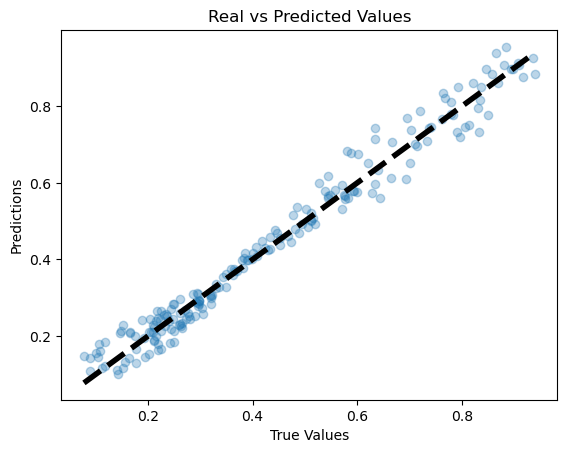

dataset2 - MAE: 0.0297, MAPE: 10.01%

Training and evaluating dataset3...


Epoch 1/500
11/11 [==============================] - 0s 735us/step - loss: 0.2893
Epoch 2/500
11/11 [==============================] - 0s 680us/step - loss: 0.1019
Epoch 3/500
11/11 [==============================] - 0s 674us/step - loss: 0.0457
Epoch 4/500
11/11 [==============================] - 0s 946us/step - loss: 0.0305
Epoch 5/500
11/11 [==============================] - 0s 715us/step - loss: 0.0213
Epoch 6/500
11/11 [==============================] - 0s 665us/step - loss: 0.0153
Epoch 7/500
11/11 [==============================] - 0s 680us/step - loss: 0.0124
Epoch 8/500
11/11 [==============================] - 0s 663us/step - loss: 0.0109
Epoch 9/500
11/11 [==============================] - 0s 467us/step - loss: 0.0102
Epoch 10/500
11/11 [==============================] - 0s 496us/step - loss: 0.0096
Epoch 11/500
11/11 [==============================] - 0s 483us/step - loss: 0.0091
Epoch 12/500
11/11 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 13/500
11

dataset3 - MAE: 0.0473, MAPE: 19.93%



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

def plot_predictions(y_test, predictions, title):
    plt.scatter(y_test, predictions, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

def train_evaluate_bpf(dataset, input_columns, output_column, epochs, learning_rate, train_val_split, shuffle=False):
    if shuffle:
        dataset = dataset.sample(frac=1).reset_index(drop=True)

    X = dataset[input_columns].values
    y = dataset[output_column].values.reshape(-1, 1)

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the dataset
    split_index = int(len(X_scaled) * train_val_split)
    X_train_val, X_test = X_scaled[:split_index], X_scaled[split_index:]
    y_train_val, y_test = y[:split_index], y[split_index:]

    # Define the BP_F network architecture dynamically based on input columns
    num_units = [len(input_columns), 10, 5, 1]
    model = Sequential()
    model.add(Dense(units=num_units[0], input_dim=len(input_columns), activation='relu'))
    for units in num_units[1:]:
        model.add(Dense(units=units, activation='relu' if units > 1 else 'linear'))  # Use linear activation for output layer

    # Compile the model with Adam optimizer and MSE loss function
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the BP_F network
    model.fit(X_train_val, y_train_val, epochs=epochs, verbose=1)

    # Evaluate the network
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mape = calculate_mape(y_test, predictions)

    # Visualize predictions
    plot_predictions(y_test, predictions, f'Real vs Predicted Values')
    
    return mae, mape

# Load the normalized datasets and drop the last column from dataset1
dataset1 = pd.read_csv('normalized_dataset1.csv')
dataset2 = pd.read_csv('normalized_dataset2.csv')
dataset3 = pd.read_csv('normalized_dataset3.csv')

dataset1 = dataset1.drop(columns=[dataset1.columns[-1]])


# Specify the parameters for each dataset
architecture_params = {
    'dataset1': {'dataset': dataset1, 'input_columns': dataset1.columns[:-1], 'output_column': dataset1.columns[-1], 'epochs': 500, 'learning_rate': 0.002, 'train_val_split': 0.85, 'shuffle': False},
    'dataset2': {'dataset': dataset2, 'input_columns': dataset2.columns[:-1], 'output_column': dataset2.columns[-1], 'epochs': 500, 'learning_rate': 0.002, 'train_val_split': 0.80, 'shuffle': False},
    'dataset3': {'dataset': dataset3, 'input_columns': dataset3.columns[:-1], 'output_column': dataset3.columns[-1], 'epochs': 500, 'learning_rate': 0.002, 'train_val_split': 0.80, 'shuffle': True}  # Assuming shuffling is needed for dataset3
}

# Train and evaluate BP_F network for each dataset
for name, params in architecture_params.items():
    print(f"Training and evaluating {name}...")
    mae, mape = train_evaluate_bpf(**params)
    print(f"{name} - MAE: {mae:.4f}, MAPE: {mape:.2f}%\n")
